# Image segmentation using Expectation-Maximization

## Prerequisites

- NumPy
- Matplotlib
- SciPy

In [1]:
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from EM import EM
from extractFeature import *

## Read Image

In [2]:
%cd ./pic segmentation

[WinError 2] The system cannot find the file specified: './pic segmentation'
C:\Users\huang\OneDrive\Modern Signal Processing\Project\EM-image-seg


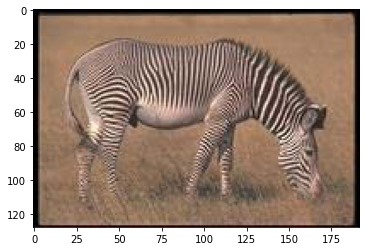

In [3]:
file = 'images/zebra.jpg'
img = cv2.imread(file)
x,y = img.shape[:-1]
if y > 500:
    x = int(500 * x / y)
    y = 500
img = cv2.resize(img, (y, x), interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## Smoothing Image

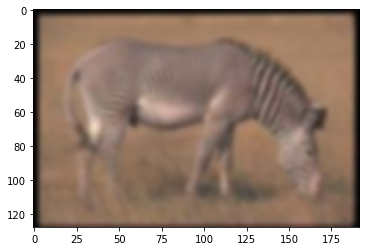

In [4]:
sigma = 1.5
filtered_img = gaussian_filter(img, sigma=(sigma, sigma,0))
# filtered_img = cv2.GaussianBlur(img, (sigma, sigma), 0)
plt.imshow(filtered_img)

## Extract Features

In [5]:
# Wenjuan's Part: find the optimal value of weight
feature = norm_and_extract_features(filtered_img, rgb_weight=1, texture_weight=0)

## Expectation-Maximization with Gaussian Mixture Model

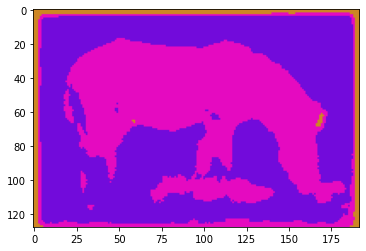

In [6]:
k = 3
em = EM(k=k, max_iter=10,init_params='kmeans')
res = em.fit(feature)

random_label_color = np.random.randint(256,size=(k,3))
clustered_img = random_label_color[res].reshape(img.shape)
plt.imshow(clustered_img)
